_____________________________________________________________________________________________________________________________________________________________________________________________

Проверка на NaN

C:\Users\Игорь.А\AppData\Local\Temp\ipykernel_5544\521197942.py:4: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

<Axes: >

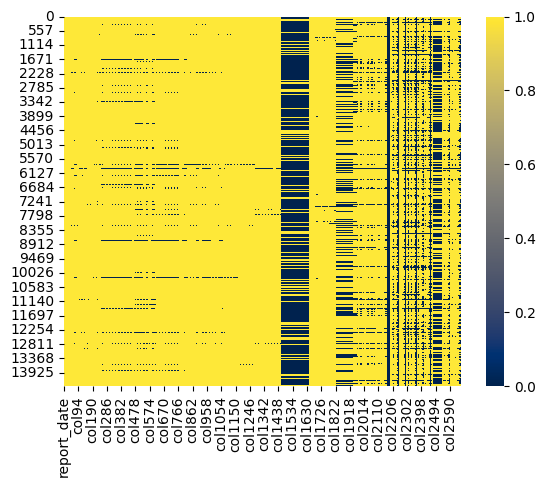

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data/train.csv")

sns.heatmap(df.isnull(), cmap='cividis', annot_kws={'size': 15000})

________________________________________________________________________________________________________________________________________________________________________________________________________

Поиск выбросов

In [ ]:
import pandas as pd

path_base = "base.csv"

df = pd.read_csv(path_base)

# Вычисление границ IQR
Q1, Q3 = df['price_per_meter'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  

# Отсеивание выбросов
df_cleaned = df[(df['price_per_meter'] >= lower_bound) & (df['price_per_meter'] <= upper_bound)]

df_cleaned.to_csv( path_base, index=False, encoding='utf-8-sig')


_____________________________________________________________________________________________________________________________________________________________________________________________

Информация о базе

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()

,floor,floors_count,rooms_count,total_meters,price_per_meter
count,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000
mean,8.297753,16.754359,2.214645,65.034401,305777.449244
std,8.004810,11.440961,1.068892,34.623901,188946.878946
min,1.000000,1.000000,1.000000,9.000000,7812.000000
25%,3.000000,9.000000,1.000000,40.000000,164784.000000
50%,6.000000,15.000000,2.000000,55.900000,252329.000000
75%,11.000000,22.000000,3.000000,79.000000,412187.000000
max,82.000000,95.000000,4.000000,342.800000,930000.000000


________________________________________________________________________________________________________________________________________________________________________________________

Распределение этажей и площади

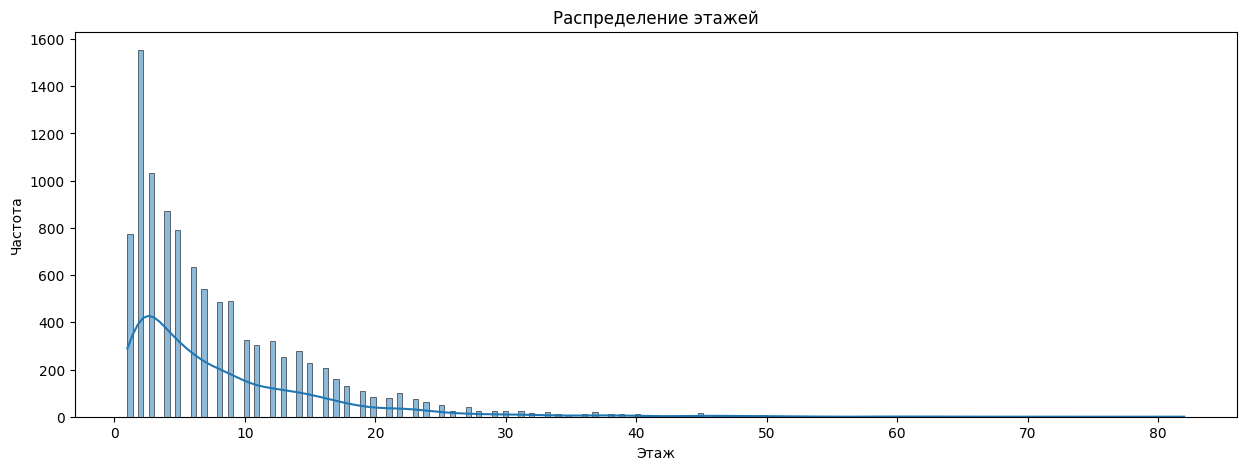

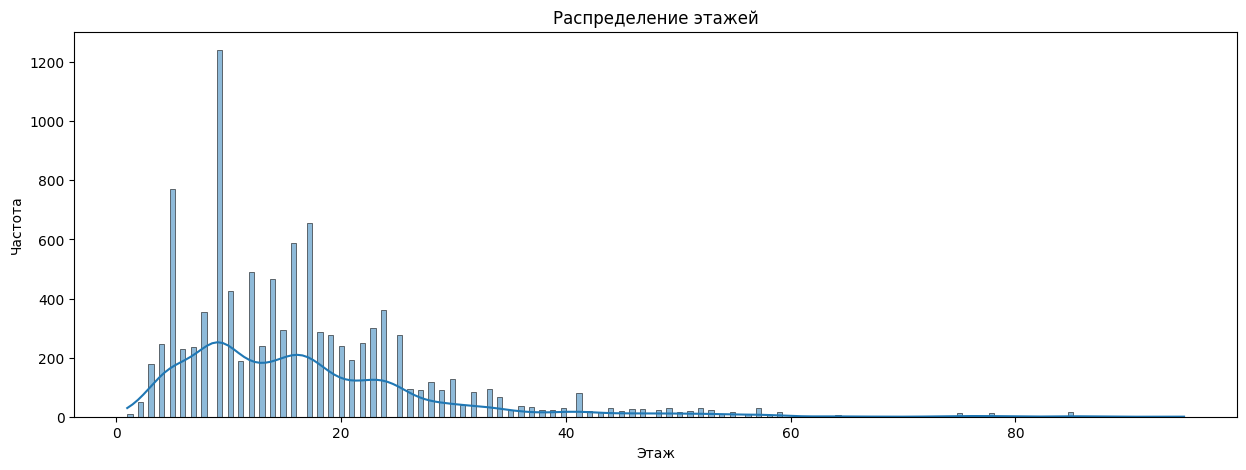

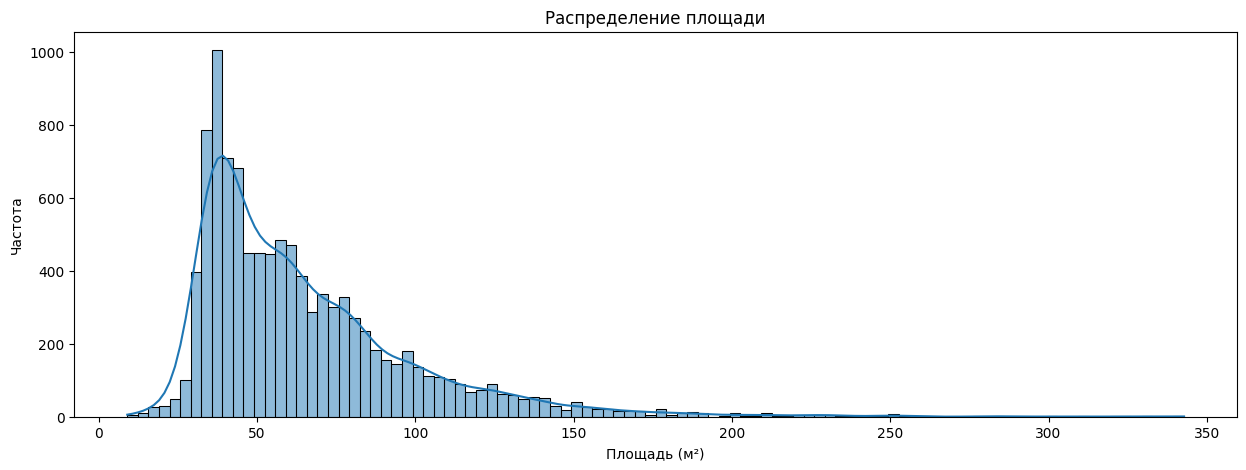

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()

#############################################################################################################################################

plt.figure(figsize=(15, 5))
sns.histplot(df['floor'], bins=200, kde=True)
plt.title('Распределение этажей')
plt.xlabel('Этаж')
plt.ylabel('Частота')

plt.figure(figsize=(15, 5))
sns.histplot(df['floors_count'], bins=200, kde=True)
plt.title('Распределение этажей')
plt.xlabel('Этаж')
plt.ylabel('Частота')

#############################################################################################################################################

plt.figure(figsize=(15, 5))
sns.histplot(df['total_meters'], bins=100, kde=True)
plt.title('Распределение площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Частота')
plt.show()


__________________________________________________________________________________________________________________________________________________________________________

Вывод информации о типах авторов и количестве комнат

In [48]:
import pandas as pd

path_base = "base.csv"
df = pd.read_csv(path_base)

print(df['author_type'].value_counts())
print('-------------------------------------------------')
print(df['rooms_count'].value_counts())

author_type
real_estate_agent           4798
developer                   4342
realtor                      497
representative_developer     361
homeowner                    281
official_representative       50
Name: count, dtype: int64
-------------------------------------------------
rooms_count
1    3354
2    3074
3    2224
4    1677
Name: count, dtype: int64


______________________________________________________________________________________________________________________________________________________________________

Вывод основной информации о взаимосвязях

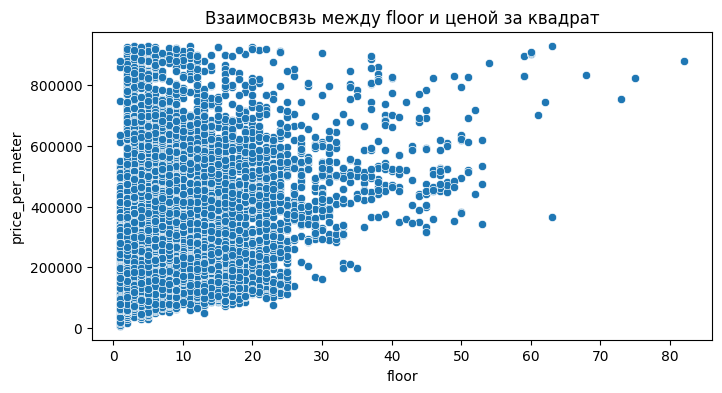

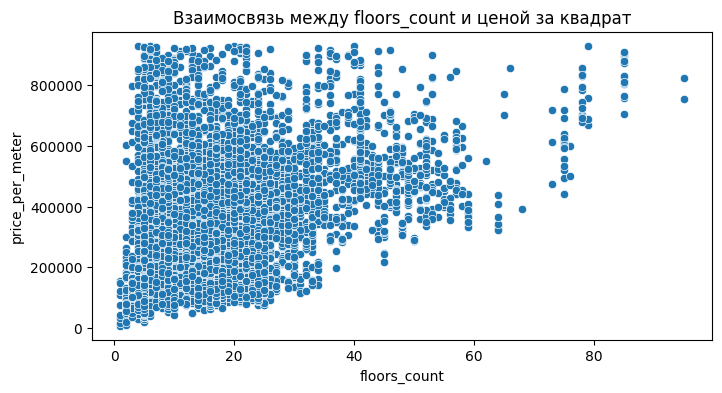

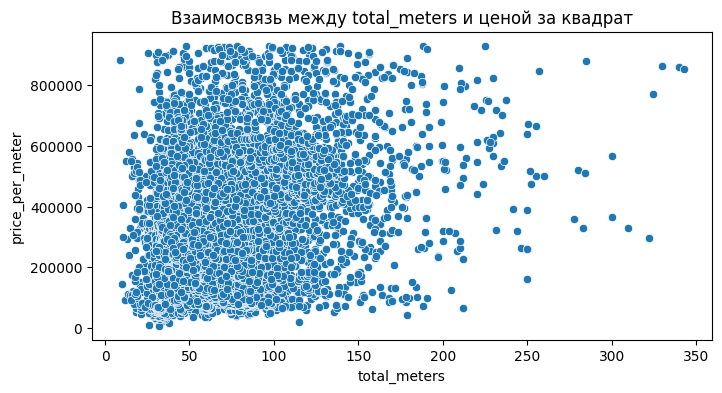

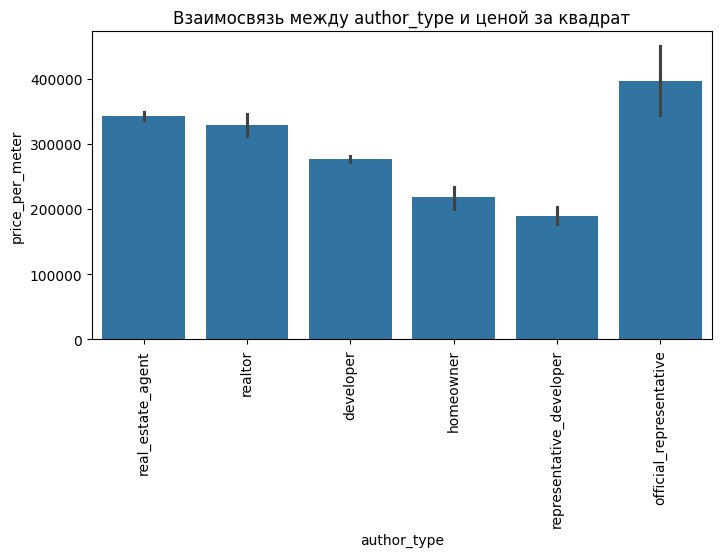

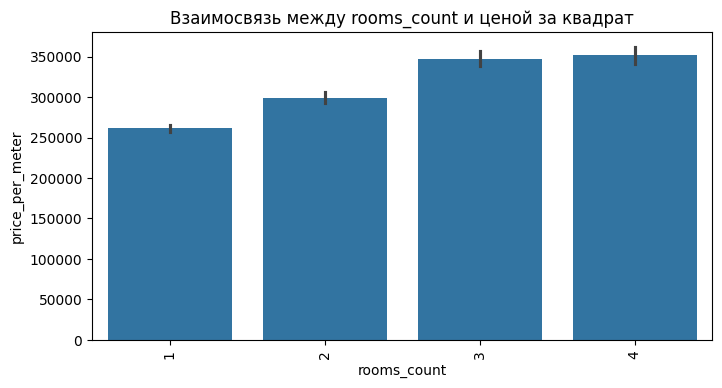

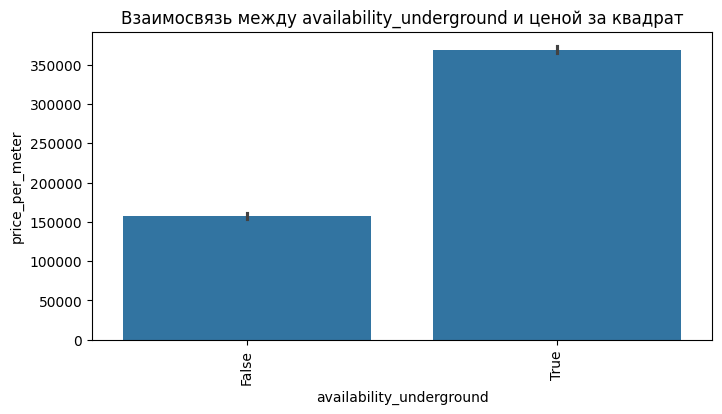

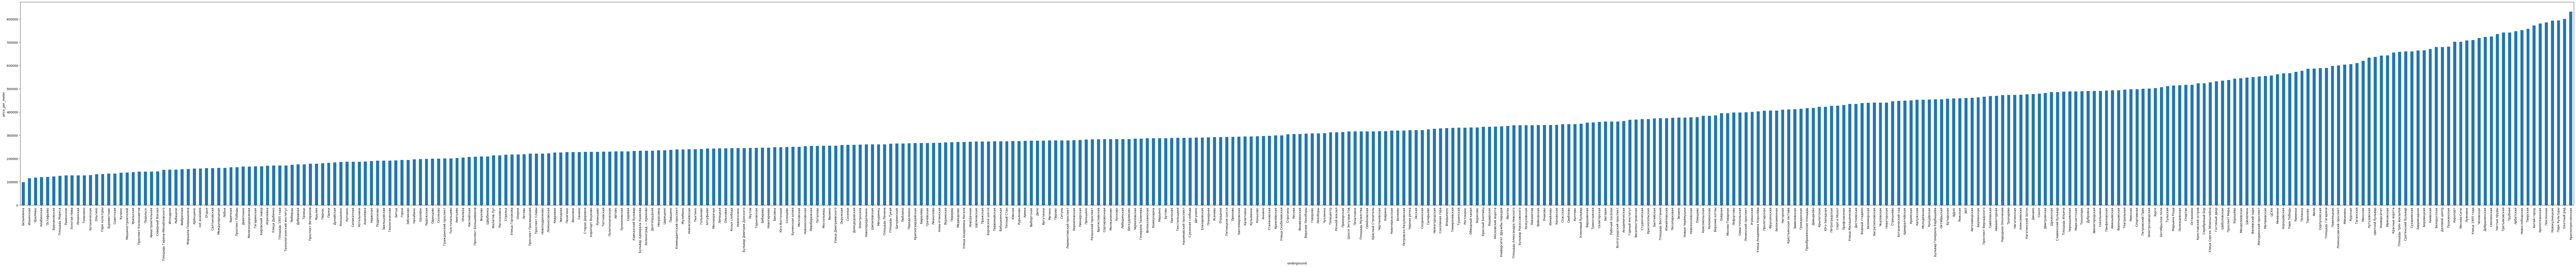

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

#############################################################################################################################################

columns_to_plot = ['floor','floors_count','total_meters']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column, y='price_per_meter')
    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.ylabel('price_per_meter')
    plt.show()

#############################################################################################################################################

columns_to_plot = ['author_type','rooms_count','availability_underground']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    sns.barplot(data=df, x=column, y='price_per_meter')

    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('price_per_meter')

    plt.show()

#############################################################################################################################################

plt.figure(figsize=(150, 12))
avg_price_per_district = df.groupby('underground')['price_per_meter'].mean().sort_values()
avg_price_per_district.plot(kind='bar')
plt.xlabel('Станции метро')
plt.xticks(rotation=90)
plt.ylabel('Цена за м²')
plt.show()




____________________________________________________________________________________________________________________________________________________________________________________

Вывод информации о корреляциях

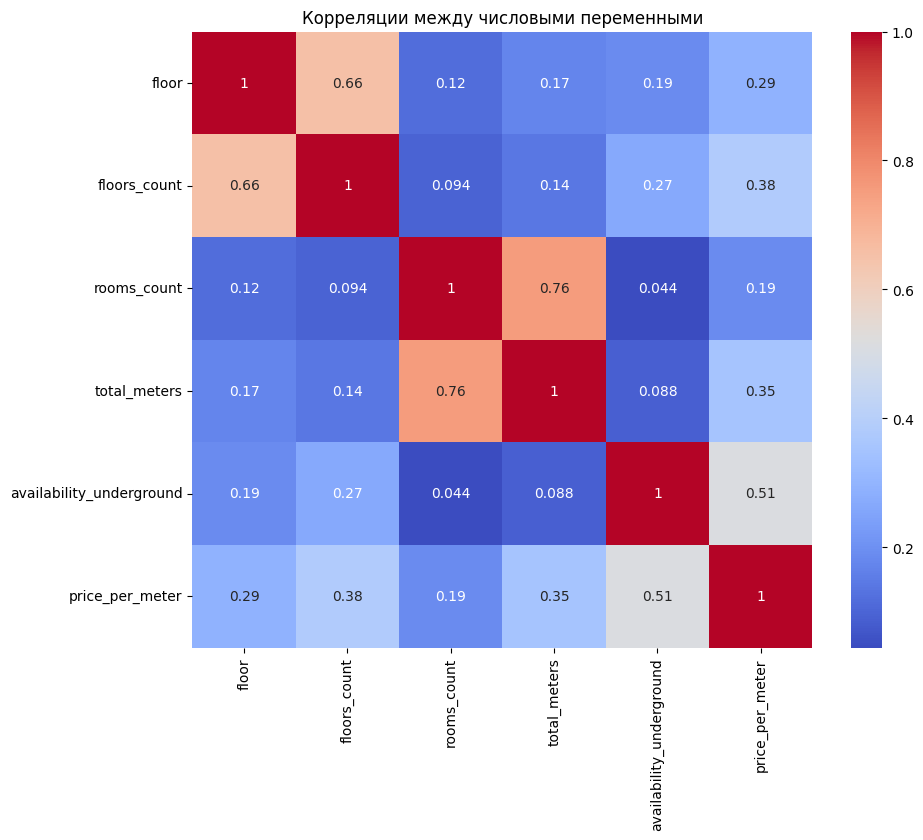

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#############################################################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

#############################################################################################################################################

numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()